#Quiz

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. 데이터 읽어오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/11. 선형회귀/data/bike-20210727T061736Z-001/bike/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##1.2. 시각화

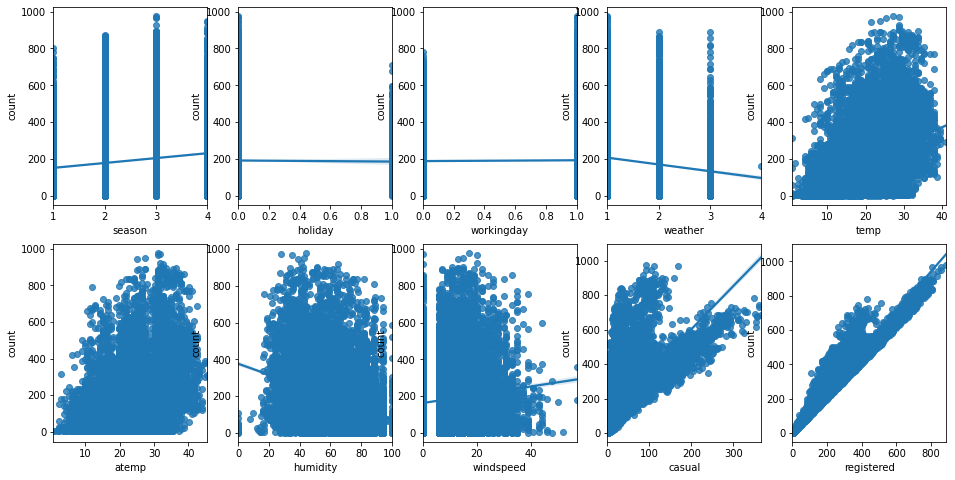

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 2개의 행과 4개의 열로 이루어진 차트
fig, axs = plt.subplots(figsize = (16, 8), ncols=5, nrows=2)
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

for i, feature in enumerate(features):
  row = i//5
  col = i%5
  sns.regplot(x=feature, y='count', data=df, ax=axs[row][col])

> 시즌, 홀리데이, 워킹데이, 레지스터 값이 선형으로 보이기때문에 이 4가지 feature를 사용한다.

In [ ]:
df_data = df[['season', 'holiday','workingday', 'registered']]
labels = df['count'].values.tolist()

In [ ]:
df_data.head()

,season,holiday,workingday,registered
0,1,0,0,13
1,1,0,0,32
2,1,0,0,27
3,1,0,0,10
4,1,0,0,1


In [ ]:
labels[:10]

[16, 40, 32, 13, 1, 1, 2, 3, 8, 14]

#2. 모델 만들기

##2.1 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standard_scaler = scaler.fit_transform(df_data)

##2.2 정규화 데이터, 표준화 데이터와 원본 데이터 점수 비교

###2.2.1 정규화 데이터

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(standard_scaler, labels, test_size=0.2, random_state=7)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.019742883379247015

### 2.2.2 원본 데이터

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.2, random_state=7)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05325987144168962

###2.2.3 표준화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normal_scaler = scaler.fit_transform(df_data)

lr = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(normal_scaler, labels, test_size=0.2, random_state=7)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.014692378328741965

> 원본데이터가 다른 데이터들에 비해 결과가 잘 나온것을 볼 수 있다ㅣ.

#3. 교차검증

##3.1 cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=2000)
scores = cross_val_score(lr, df_data, labels, cv=5)
print(scores)
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

KeyboardInterrupt: ignored

##3.2 GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)

def get_best_param(cost_list):
  param = {
      'penalty' : ['l2'],
      'C' : cost_list
  }

  grid_cv = GridSearchCV(lr, param, cv=5, scoring='accuracy')
  grid_cv.fit(df_data, labels)
  print('\n====================================================================')
  print('best score :', grid_cv.best_score_)
  print('bset params :', grid_cv.best_params_)
  print('\n====================================================================')

In [ ]:
C_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
get_best_param(C_list)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: ignored

=======================================================================
#강사님코드

##1. 파일 읽기

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/11. 선형회귀/data/bike-20210727T061736Z-001/bike/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/11. 선형회귀/data/bike-20210727T061736Z-001/bike/test.csv')
df_train.head()
df_train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


>* session : 1=봄, 2=여름, 3=가을, 4=겨울
* holiday : 1=토일을 제외한 휴일, 0=휴일이 아닌 날
* workingday : 1 = 평일, 0 = 주말 및 휴일
* weather : 1=맑음, 약간 구름 낀 흐림, 2=안개, 안개+흐림, 3=가벼운 눈, 가벼운 비+천둥, 4=심한 눈/비, 천둥/번개
* temp : 온도(섭씨)
* atemp : 체감온도(섭씨)
* humidity : 습도
* windspeed : 풍속
* casual : 사전에 등록되지 않은 사용자가 대여한 회수
* registered : 사전에 등록한 사용자가 대여한 횟수
* count : 대여횟수

> head와 tail로 확인 결과 datetime의 정보는 년, 월, 일 시까지만 변경되면 분,초는0으로 표시되는 것을 알 수 있다.

##2. 데이터 변환
> datetime을 이용하여 년, 월, 일, 시간으로 분리할 것이다.

###2.1 데이터 확인

In [24]:
df_train['datetime'].head()

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

> 현재 datetime의 형식이 object형으로 되어 있어 날짜 분리가 쉽지 않다.

###2.2 데이터 변환

In [25]:
df_train['datetime'] = df_train['datetime'].apply(pd.to_datetime)
df_train['datetime'].head(2)

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
Name: datetime, dtype: datetime64[ns]

> pandas에 있는  to_datetime함수를 이용하여 object형을 datetime형식으로 변경하였다.

In [27]:
print(df_train['datetime'][0])
print(df_train['datetime'][0].year)
print(df_train['datetime'][0].month)
print(df_train['datetime'][0].day)
print(df_train['datetime'][0].hour)

2011-01-01 00:00:00
2011
1
1
0


> 현재 datetime의 자료형이 datetime64이기 때문에 year, month, day, hour 키워드로 각 데이터를 추출할 수 있다.

In [31]:
df_train['datetime'].apply(lambda x: x.year)

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

> x는df_train['datetime']의 각 값들을 하나씩 읽어 들이므로 그 값 중 year정보만 추출한 것이다.

> year. month, day, hour를 별도의 feature로 만들어 데이터를 저장하시오

In [30]:
df_train['year'] = df_train['datetime'].apply(lambda x: x.year)
df_train['month'] = df_train['datetime'].apply(lambda x: x.month)
df_train['day'] = df_train['datetime'].apply(lambda x: x.day)
df_train['hour'] = df_train['datetime'].apply(lambda x: x.hour)

df_train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


###2.3 불필요한 데이터 제거
> 자전거 대여 횟수를 예측함에 있어 casual(사전에 등록되지 않은 사용자가 대여한 횟수), registered(사전에 등록한 사용자가 대여한 횟수), feature는 큰 영향을 미치지 않을 것 이므로 제거할 것이다. 
또한 날짜 정보는 년, 월, 일, 시간으로 분리했음으로 더 이상 필요 없게 된다.

In [33]:
drop_list = ['casual', 'registered', 'datetime']
df_train.drop(columns=drop_list, axis=1, inplace=True)

##3. 성능 평가 지표
> 이번 챕터에서는 예측 성능 측정을 위해 RMSLE(Root Mean Squared Log Error)에 대해 알아 볼 것이다.

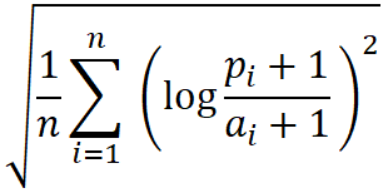

> RMSLE는 위와 같은 식으로 나타난다. pi는 예측값을 ai는 실제값을 의미한다. sklearn에서는 RMSLE를 지원하지 않기 때문에 별도로 함수를 만들 것이다.

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def get_rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  mlse = np.sum((log_y - log_pred)**2)
  #rmsle = np.sqrt(mlse)
  rmsle = np.sqrt(np.mean(mlse))
  return rmsle

def get_rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def eval_reg(y, pred):
  rmsle = get_rmsle(y, pred)
  rmse = get_rmse(y, pred)
  mae = mean_absolute_error(y, pred)

  print('RMSLE : ', rmsle)
  print('RMSE : ', rmse)
  print("MAE : ", mae)

> MAE는 예측값과 실제값의 편차에 대한 절대값의 평균을 의미한다.

##4. 모델 만들기

###4.1 데이터 분류

In [37]:
from sklearn.model_selection import train_test_split
df_labels = df_train['count']
df_data = df_train.drop(columns=['count'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, random_state=62)

> 원본 데이터에서 이미 train, test를 분리 해 두었기 때문에, 위의 내용은 처리하면 안되지만, 학습 차원에서 반복적인 내용을 처리하지 않기 위해 train 정보를 원본 데이터라고 생각하고 학습 데이터와 검증데이터로 분류해 사용한다.

###4.2 모델 만들기

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

eval_reg(y_test, pred)

RMSLE :  66.57220364352084
RMSE :  143.56472659040594
MAE :  107.04602134107608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


> 실행 결과 실제 값과 예측 값의 차이가 많게 나타난다.

###4.3 데이터 확인

In [ ]:
y_test

In [ ]:
pred

In [47]:
df_sub = pd.DataFrame(data=y_test.values, columns=['real'])
df_sub.head(2)

,real
0,453
1,448


> 실제 값을 dataframe으로

In [51]:
df_sub['pred'] = pred
df_sub['diff'] = np.abs(df_sub['real'] - df_sub['pred'])
df_sub.sort_values('diff')

,real,pred,diff
90,1,1.045839,0.045839
2935,129,129.119477,0.119477
519,9,9.155573,0.155573
446,59,58.837297,0.162703
3049,239,238.786961,0.213039
...,...,...,...
351,970,409.112894,560.887106
542,917,341.899125,575.100875
427,948,366.327974,581.672026
1362,977,391.085473,585.914527


> 만든 dataframe에 예측값과 차이값을 추가로 넣는다. 차이값을 보면 음수가 나타나게 되어 절대값으로 변환할 것이다.

> 절대값으로 변환한것의 정렬 결과를 확인하면 실제값과 예측값의 차이가 크게 나타나는 것을 볼 수 있다.

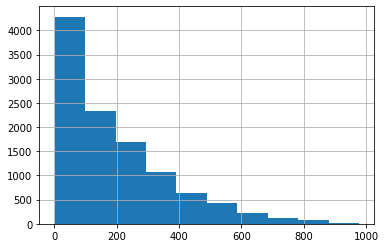

In [52]:
df_labels.hist()

> 예측을 위한 데이터의 분포는 정규 분포가 되었을 때 더 좋은 성능을 갖게 된다. 위의 데이터를 보면 한쪽으로 쏠려있는 모양으로 나타나 성능이 떨어지게 된다. 따라서 정규 분포로 만들기 위해 log함수를 이용할 것이다. 일반 데이터를 log로 변환하게 되면 데이터의 분포가 정규 분포 형식을 갖게 된다.

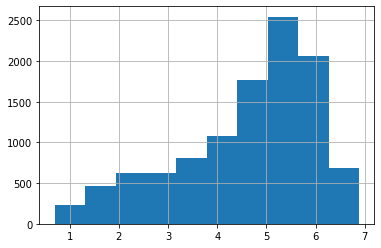

In [53]:
df_log_labels = np.log1p(df_labels)
df_log_labels.hist()

> 실행결과 완벽한 정규 분포는 아니지만 비슷한 모양으로 나타나긴 했다. 이를 이용하여 다시한번 예측값을 출력해 보자.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, df_log_labels, test_size=0.3, random_state=62)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 로그된 값이기 떄문에 원래값보다 작게 나온다. 원래 값으로 바꾼후에 결과를 확인해야 한다.
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  57.87568461974528
RMSE :  161.46859236688547
MAE :  107.66924421282333


##6. 원핫 인코딩

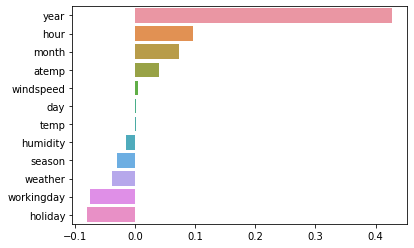

In [56]:
import seaborn as sns

coeff = pd.Series(data=lr.coef_, index=df_data.columns)
coeff_sort = coeff.sort_values(ascending=False)
sns.barplot(x=coeff_sort.values, y=coeff_sort.index)

> 회귀 계수가 가장 큰 값인 year가 자전거 대여에 큰 영향을 미치는 것으로 나타났다. 이는 2011, 2012의 큰 수치로 인식되어 문제가 발생된 것이다. 수치가 아닌 범주로 표현되어야 하기 때문에 원-핫 인코딩으로 문제를 해결할 것이다.

In [57]:
df_data.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0


In [58]:
col_list = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']
df_data_ohe = pd.get_dummies(df_data, columns=col_list)
df_data_ohe.head(3)

,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> 전체 feature에서 수치 데이터를 제외한 나머지 정보 모두 원-핫 인코딩으로 변경해야 하기 때문에 ['season', 'holiday', 'workingday', 'weather'] 4가지가 추가되었다.

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 로그된 값이기 떄문에 원래값보다 작게 나온다. 원래 값으로 바꾼후에 결과를 확인해야 한다.
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.06786777788388
RMSE :  97.99514264397186
MAE :  63.93917807249035


##7. 하이퍼 파라미터

###7.1 성능 평가 함수

In [64]:
from sklearn.model_selection import GridSearchCV

def get_best_param(model, alpha_list):
  params={
      'alpha' : alpha_list
  }

  # 수가 작을수록 좋기 때문에 neg_mean_squared_error를 쓴다.
  grid_cv = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
  grid_cv.fit(df_data_ohe, df_log_labels)

  print('\n===============================================')
  print('best score : ', grid_cv.best_score_)
  print('best params : ', grid_cv.best_params_)
  print('================================================\n')

> 예측 모델에서 큰 값일수록 좋은 성능을 표현한다. 하지만 선형회귀에서 실제값과 예측값의 편차가 크면 안좋은 성능으로 나타나기 때문에 큰 수를 작은 수로 인식 시키기 위해 음수로 표현하였다. 음수 표현을 위해 neg_mean_squared_error 평가 지표를 사용하였다.

###7.2 Ridge

In [63]:
from sklearn.linear_model import Ridge

model = Ridge()
alpha_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
get_best_param(model, alpha_list)


best score :  -0.38162495422399517
best param :  {'alpha': 10}



> 위의 범위를 1보다 크고 25보다 작은 수를 지정해야 한다. 따라서 시작값은 2이고 끝값은 25인 값을 지정하면 된다.  

In [65]:
alpha_list = list(range(2, 25))
get_best_param(model, alpha_list)


best score :  -0.38143456644880447
best params :  {'alpha': 6}



In [66]:
alpha_list = list(range(50, 70, 1))
for i in range(len(alpha_list)):
  alpha_list[i] = alpha_list[i]/10
get_best_param(model, alpha_list)


best score :  -0.3814319403176457
best params :  {'alpha': 6.4}



> 결국 최적의 파라미터는 alpha : 6.4가 나왔다. 

In [71]:
ridge = Ridge(alpha=6.4)
X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

# 로그된 값이기 떄문에 원래값보다 작게 나온다. 원래 값으로 바꾼후에 결과를 확인해야 한다.
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.08434951713064
RMSE :  98.5526248117516
MAE :  64.20469698043377


>  Ridge의 하이퍼 파라미터는 6.4이었음으로 alpha를 6.4로 지정한 후 성능 평가를 진행하면 된다. 진행 결과가 큰 차이를 보이지는 않는다.

###7.3 Lasso

In [67]:
from sklearn.linear_model import Lasso

model = Lasso()
alpha_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
get_best_param(model, alpha_list)


best score :  -0.3793875730951889
best params :  {'alpha': 0.001}



In [72]:
from sklearn.linear_model import Lasso

model = Lasso()
alpha_list = list(range(1, 20))
for i in range(len(alpha_list)):
  alpha_list[i] = alpha_list[i]/10000
get_best_param(model, alpha_list)


best score :  -0.3793350674040491
best params :  {'alpha': 0.0012}



> 최적의 값은 0.0012가 나왔다.

In [74]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0012)
X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

# 로그된 값이기 떄문에 원래값보다 작게 나온다. 원래 값으로 바꾼후에 결과를 확인해야 한다.
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.09502511250567
RMSE :  98.94061160220313
MAE :  63.98452554484278


###7.4 Elastic net

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

def get_best_param_Elastic_net(alpha_list, l1_list):
  params={
      'alpha' : alpha_list,
      'l1_ratio' : l1_list
  }

  model = ElasticNet()
  # 수가 작을수록 좋기 때문에 neg_mean_squared_error를 쓴다.
  grid_cv = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
  grid_cv.fit(df_data_ohe, df_log_labels)

  print('\n===============================================')
  print('best score : ', grid_cv.best_score_)
  print('best params : ', grid_cv.best_params_)
  print('================================================\n')

In [77]:
from sklearn.linear_model import ElasticNet

alpha_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
l1_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
get_best_param_Elastic_net(alpha_list, l1_list)


best score :  -0.3793875730951889
best params :  {'alpha': 0.001, 'l1_ratio': 1.0}



In [ ]:
from sklearn.linear_model import ElasticNet

alpha_list = list(range(1, 20))
for i in range(len(alpha_list)):
  alpha_list[i] = alpha_list[i]/10000
l1_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
get_best_param_Elastic_net(alpha_list, l1_list)

> best score :  -0.3793350674040491

> best params :  {'alpha': 0.0012, 'l1_ratio': 1.0}

In [79]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.0012, l1_ratio=1.0)
X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

elastic_net.fit(X_train, y_train)
pred = elastic_net.predict(X_test)

# 로그된 값이기 떄문에 원래값보다 작게 나온다. 원래 값으로 바꾼후에 결과를 확인해야 한다.
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.09502511250567
RMSE :  98.94061160220313
MAE :  63.98452554484278
